<img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/70_Rojo.jpg" alt="udenar" width="140"/>
<div style="text-align: center"> DIPLOMADO EN INTELIGENCIA DE NEGOCIOS</div>

</div>


In [15]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd 
import numpy as np 
import math

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
#plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
datos = pd.read_csv("familycar.csv")  

In [4]:
datos

,Nombre,CaballosFuerza,Precio,Familiar
0,Honda Civic,52,11500,1
1,Merc 240D,62,11900,1
2,Ford Festiva 4,63,6319,1
3,Toyota Corolla,65,17872,1
4,Fiat 128,66,3470,1
...,...,...,...,...
84,Lincoln Continental,215,58900,0
85,Ford Mustang V8,225,12164,0
86,Chrysler Imperial,230,9750,0
87,Duster 360,245,34500,0


# Explorar datos

Revise los atributos, la categoría, datos nulos, etc (hagalo de forma libre)

In [4]:
datos.columns


Index(['Nombre', 'CaballosFuerza', 'Precio', 'Familiar'], dtype='object')

In [5]:
datos.describe()

,CaballosFuerza,Precio,Familiar
count,89.000000,89.000000,89.000000
mean,127.426966,15185.303371,0.382022
std,41.694475,12743.969663,0.488635
min,52.000000,2500.000000,0.000000
25%,100.000000,9745.000000,0.000000
50%,113.000000,12495.000000,0.000000
75%,150.000000,15930.000000,1.000000
max,245.000000,96500.000000,1.000000


In [6]:
datos['Familiar'].unique()

array([1, 0])

In [7]:
#comprobar si hay vslores nulos
datos.isnull().sum()

Nombre            0
CaballosFuerza    0
Precio            0
Familiar          0
dtype: int64

# Transformar Datos

In [8]:
#eliminar columnas
#datos1 = datos.drop(['Cabina','ID','Nombre','Tiquete','Embarque'], axis=1,inplace=True)

In [9]:
#eliminar valos nulos
datos.dropna(inplace=True)

In [10]:
#operar spbre
#datosx = datos[(datos['Edad'] > 78) & (datos['Edad'] <= 80)]

# Visualizar datos

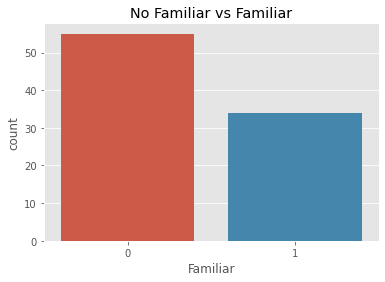

Familiar
0    55
1    34
dtype: int64

In [11]:
sns.countplot(x='Familiar',data=datos)
plt.title('No Familiar vs Familiar')
plt.show()
datos.value_counts(datos['Familiar'], sort = True) #comparacion de clase 0=pierde 1=gana

/tmp/ipykernel_237/528348863.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datos.drop(['Familiar'],1).hist(facecolor='blue', alpha=0.9, bins=10)


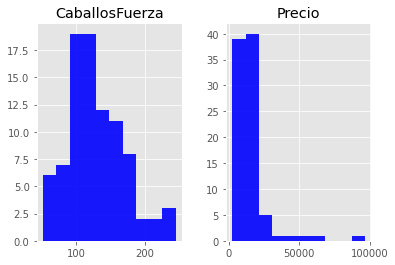

In [12]:
datos.drop(['Familiar'],1).hist(facecolor='blue', alpha=0.9, bins=10)
#datos.hist(bins = 30, figsize=(10,10), color = 'b');
plt.show()

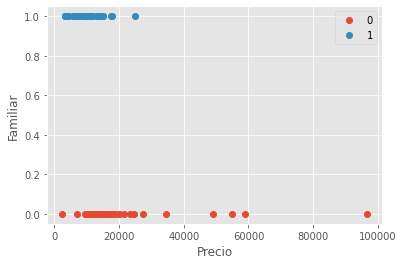

In [13]:
datos.plot.scatter(x='Precio', y='Familiar',s=0);

groups = datos.groupby("Familiar")
for name, group in groups:
    plt.plot(group["Precio"], group["Familiar"], marker="o", linestyle="", label=name)
    plt.legend()

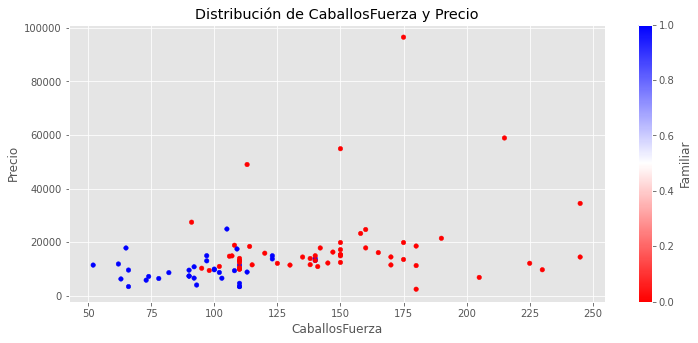

In [14]:
fig, ax = plt.subplots(figsize=(12, 5.1))

datos.plot(
    x    = 'CaballosFuerza',
    y    = 'Precio',
    c  = 'Familiar',
    kind = "scatter",
    ax   = ax,
    cmap='bwr_r'
)



ax.set_title('Distribución de CaballosFuerza y Precio');

In [15]:
#filtrar datos
datos1 = datos[(datos['Precio'] < 30000) & (datos['CaballosFuerza'] < 200)]

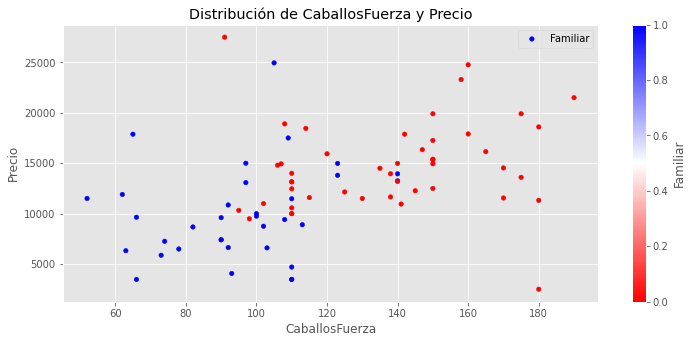

In [16]:
fig, ax = plt.subplots(figsize=(12, 5.1))


colores=['red','blue']
asignar=[]

for index, row in datos1.iterrows():
    if(row['Familiar']==0):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

        
datos1.plot(x = 'CaballosFuerza', y = 'Precio', kind = "scatter", ax=ax, label='Familiar', c = 'Familiar', cmap='bwr_r') #copper


ax.set_title('Distribución de CaballosFuerza y Precio');

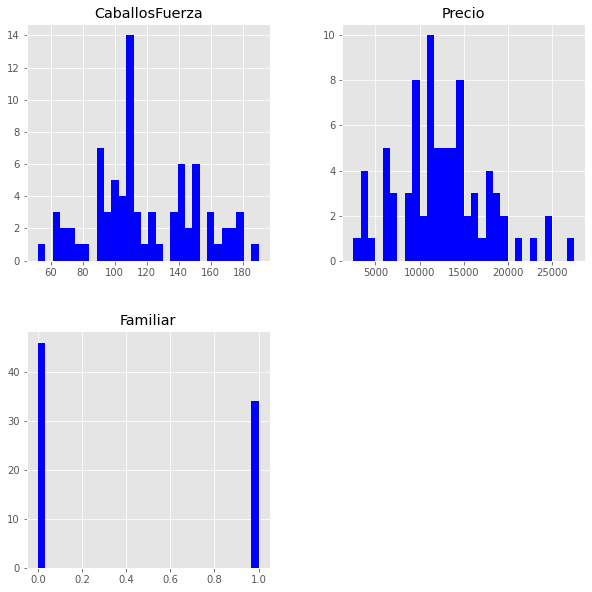

In [17]:
datos1.hist(bins = 30, figsize=(10,10), color = 'b');

In [18]:
#from scipy import stats

corr_test = pearsonr(x = datos1['CaballosFuerza'], y =  datos1['Familiar'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])


Coeficiente de correlación de Pearson:  -0.6472115582321979
P-value:  8.759969989632635e-11


# features and class

In [7]:
# Features  y clase 
features = ['CaballosFuerza']
X = datos[features].to_numpy() # Features
y = datos['Familiar'].to_numpy()

X = X.reshape(-1,1)
y = y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Dataset de entranamiento y testeo

In [9]:
#datos de entreno y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Selección de modelo

In [10]:
modelo = LogisticRegression()

# entretar el modelo

In [12]:

modelo = modelo.fit(X_train,y_train)


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# predecir para el dataset de testeo 

In [13]:
y_pred = modelo.predict(X_test)


In [24]:
# Información del modelo
# ==============================================================================
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente:', modelo.intercept_)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
# Error Cuadrado Medio
print("Coeficiente de determinación R^2:", modelo.score(X, y))


Termino independiente: 1.1841668621901702
Coeficiente: [('CaballosFuerza', -0.006521316926572598)]
Coeficiente de determinación R^2: 0.3724579814770712


In [25]:
# Error de test del modelo 
# ==============================================================================
predic = modelo.predict(X_test)
print(predic[0:40,])

'''
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predic,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")
'''

[ 0.44725805  0.28422513  0.47986463  0.59724834  0.38204488  0.84505838
  0.20596932  0.55159912  0.59724834  0.53203517  0.75375995  0.466822
  0.466822    0.01032982  0.01032982  0.466822    0.0429364   0.23857591
 -0.28312945  0.466822    0.49942858  0.40160883  0.47334332  0.59724834
  0.20596932  0.48638595  0.20596932]


'\nrmse = mean_squared_error(\n        y_true  = y_test,\n        y_pred  = predic,\n        squared = False\n       )\nprint("")\nprint(f"El error (rmse) de test es: {rmse}")\n'

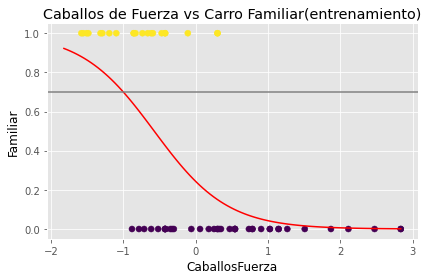

In [16]:
#Curva del modelo
coeficiente = modelo.coef_.flatten() #aplanar [3,4] [2,2] = [3,4,2,2]
intercepto = modelo.intercept_.flatten() #aplanar 
curva_logistica = lambda x: 1/(1 + math.e**(-(coeficiente*x+intercepto)))  
x_values = np.linspace(min(X), max(X), 100) #devuelve un vector de fila de n puntos equidistantes
y_values = curva_logistica(x_values)
plt.plot(x_values,y_values, color="red")
#Lo que nos da el modelo son los coeficientes y el intercepto, pero, debemos 
#tener en cuenta que se evalua sobre valores genéricos de x

plt.axhline(.7, color='.5')

plt.scatter(X_train, y_train, c=np.squeeze(y_train))
#plt.plot(X_test, predic, color='orange', linewidth=3 )
plt.title('Caballos de Fuerza vs Carro Familiar(entrenamiento)')
plt.xlabel('CaballosFuerza', color='black')
plt.ylabel('Familiar', color='black')

#plt.xticks(())
#plt.yticks(())

#poner las dos clases en distintos colores 
plt.tight_layout()

plt.show()

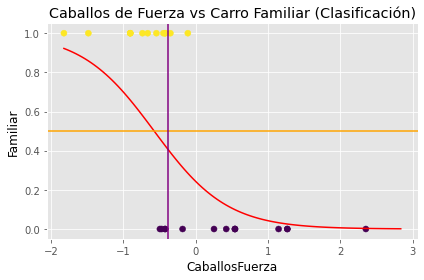

In [25]:
#Curva del modelo
coeficiente = modelo.coef_.flatten()
intercepto = modelo.intercept_.flatten()
curva_logistica = lambda x: 1/(1 + math.e**(-(coeficiente*x+intercepto)))  
x_values = np.linspace(min(X), max(X), 113)
y_values = curva_logistica(x_values)
plt.plot(x_values,y_values, color="red")
#Lo que nos da el modelo son los coeficientes y el intercepto, pero, debemos 
#Se debe tener en cuenta que se evalua sobre valores genéricos de x
#Fin de curva del modelo


valh = 0.5
valv = -0.38
#plt.scatter(X_train, y_train, c=np.squeeze(y_train))
plt.scatter(X_test, y_test, c=np.squeeze(y_test))
#plt.plot(X_test, predic, color='orange', linewidth=3 )
plt.title('Caballos de Fuerza vs Carro Familiar (Clasificación)')
plt.xlabel('CaballosFuerza', color='black')
plt.ylabel('Familiar', color='black')
plt.axhline(valh, color='orange')
plt.axvline(valv, color='Purple')


plt.tight_layout()

plt.show()

# Probar Modelo

In [24]:
modelo.predict([[240]])
#['Fuerza']

array([0])